# KMeans Clustering:

# Import necessary packages and Obtain Data:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import timestamp
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.style.use('seaborn-notebook')

## Data Description

|**Field**  | **Description**|
|--|--|
|userName  | Name of user that reviewed the product|
|content | The text supporting the stars assigned at the review|
|thumbsUpCount | count of how many other users appreciated the review (helps for relevance)|
|reviewCreatedVersion | The version of the app being reviewed|
|at | the review date
|replyContent | Text/content if there is a reply to a review from the app administrators|
|repliedAt | Timestamp for the replyContent field
|application| the app being reviewed


In [5]:
#loading df used for clustering from main file
cluster_clean_content = pd.read_csv('csvs/cluster_clean_content.csv')
clean_df = pd.read_csv('csvs/clean_df.csv')


In [6]:
clean_df.head()

Unnamed: 0        userName  \
0           0  Brogan Houston   
1           1    Aubrey Karim   
2           2       Glenneroo   
3           3       Nathan T.   
4           4         Kylie O   

                                             content  score  thumbsUpCount  \
0  ['care', 'sleep', 'story', 'use', 'white', 'no...      1            837   
1  ['great', 'sleep', 'meditation', 'however', 'w...      4            344   
2  ['even', 'try', 'without', 'creating', 'login'...      1            698   
3  ['sure', 'low', 'review', 'really', 'good', 'a...      5            305   
4  ['really', 'great', 'fact', 'much', 'content',...      3            524   

  reviewCreatedVersion                   at replyContent repliedAt  \
0                 4.29  2020-07-11 09:06:57          NaN         _   
1                 4.29  2020-07-07 16:40:53          NaN         _   
2                 4.29  2020-07-07 19:32:31          NaN         _   
3                 4.29  2020-07-07 21:05:20          NaN         _   
4                 4.29  2020-07-15 05:49:42          NaN         _   

        application  replied   Target  
0  com.calm.android    False      bad  
1  com.calm.android    False  neutral  
2  com.calm.android    False      bad  
3  com.calm.android    False     good  
4  com.calm.android    False  neutral

## Clustering on the entire corpus across all reviews didn't provide too much insight:

Reference on KElbowVisualiser
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette score, the mean silhouette coefficient for all samples or the calinski_harabasz score, which computes the ratio of dispersion between and within clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

>**WARNING**: FIRST VISUALIZER TAKES 2 HOURS TO RUN, SECOND TAKES 1

Result from KElbowVisualizer using distortion metric indicates 5 clusters

In [10]:
import yellowbrick
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

clean_content = clean_df['content']

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(clean_content)

tf_words = tfidf.get_feature_names()

LDA: from https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc

In [25]:
len(tfidf.vocabulary_)

20315

>⏰**WARNING** this model takes 2.5 hours to run.⏰

Default metric for KElbowVisualizer is *Distortion score* which is calcluated by computing the sum of squared distances from each point to its assigned center

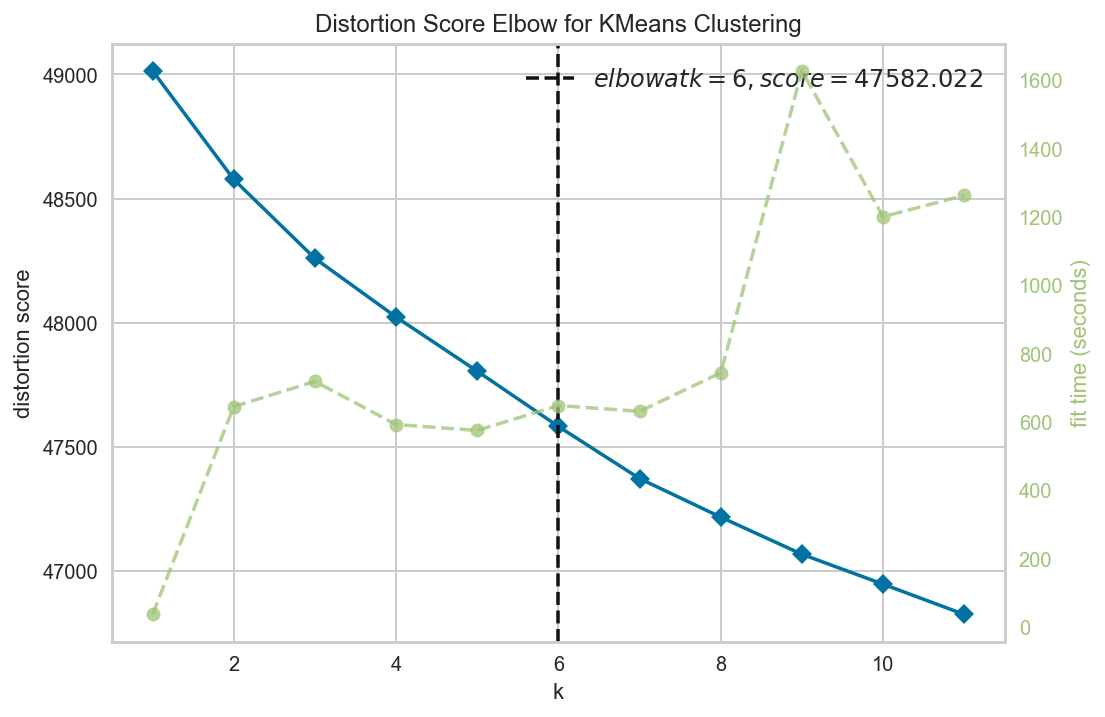

In [27]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)
visualizer.show(outpath='6cluster_elbow')

Other variations for this plot can be found in this repo: under images https://github.com/andiosika/Flatiron_Capstone/

In [46]:
visualizer.show(outpath="all_elbow.pdf")

<Figure size 576x396 with 0 Axes>

In [43]:
all_elbow = visualizer.show(outpath='all_elbow.png')

<Figure size 576x396 with 0 Axes>

In [51]:
from IPython.display import Image

![Elbow Plot](img/elbow_vis.png)


In [55]:
import pickle
#pickeling this visualization since it takes 2.5hrs to run:
with open("visualizer.pickle", "wb") as f:
    pickle.dump(visualizer, f)

In [62]:
# load the model from disk
visualizer_in = open("visualizer.pickle","rb")
visualizer = pickle.load(visualizer_in)

In [63]:
visualizer.show()

In [64]:
visualizer.elbow_value_

6

## KMeans model: 5 clusters 

In [79]:
import pandas as pd

In [8]:
X_train = pd.read_csv('csvs/X_train.csv', index_col=0, header=None, squeeze=True);
X_train.dropna(inplace=True)

In [11]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(X_train)

In [12]:
kmeans = KMeans(n_clusters=6).fit(tfidf)

In [13]:
X_test = pd.read_csv('csvs/X_test.csv', index_col=0, header=None, squeeze=True);
X_test.dropna(inplace=True)

In [14]:
preds = kmeans.predict(tfidf_vectorizer.transform(X_test))

In [15]:
xtrain = pd.DataFrame(X_train)
xtrain

1
0                                                       
6414   best mindfulness hand imo ive tried geared tow...
38857  workout perfect need give second workout get p...
1176            great daily check-in deeper session love
24014  love helped much fact pay continue session bey...
41981  bad update update 3.21 nice new interface phon...
...                                                  ...
44566  distance 0.1mile mile walked consistently walk...
30280  absolute scam buy opened paying 30€ find worse...
6637   started incorporate different element daily li...
35343                    cool got result wanted two week
23720  okay yes everything pay pay buy subscription g...

[34997 rows x 1 columns]

In [16]:
xtrain.columns = [ 'content']
xtrain

content
0                                                       
6414   best mindfulness hand imo ive tried geared tow...
38857  workout perfect need give second workout get p...
1176            great daily check-in deeper session love
24014  love helped much fact pay continue session bey...
41981  bad update update 3.21 nice new interface phon...
...                                                  ...
44566  distance 0.1mile mile walked consistently walk...
30280  absolute scam buy opened paying 30€ find worse...
6637   started incorporate different element daily li...
35343                    cool got result wanted two week
23720  okay yes everything pay pay buy subscription g...

[34997 rows x 1 columns]

In [17]:
xtrain['6cluster'] = kmeans.labels_

In [18]:
sixcluster1 = xtrain[xtrain['6cluster']== 1]

In [19]:
from nltk import FreqDist

In [20]:
sixcluster1['content']

0
1176              great daily check-in deeper session love
13643    great counting calorie tacking weight logging ...
42604                         great stay synced phone time
13177    fantastic free version great tracking calorie ...
35843                               great exercise tracker
                               ...                        
14119    great selection food make calorie counting muc...
20026    never thought get meditating regular basis tak...
15905                         great tracking calorie macro
14696        great learning started biking need track much
18898         great nothing else keep general track intake
Name: content, Length: 1906, dtype: object

In [21]:
sixcluster1text = sixcluster1['content'].to_string()

In [22]:
import functions as fn

In [23]:
fn.clean_freq(sixcluster1text)

[('great', 1885),
 ('track', 225),
 ('calorie', 189),
 ('love', 188),
 ('help', 159),
 ('food', 147),
 ('work', 145),
 ('really', 142),
 ('keep', 139),
 ('exercise', 110),
 ('way', 103),
 ('tracking', 101),
 ('meditation', 90),
 ('weight', 87),
 ('use', 85),
 ('workout', 83),
 ('sleep', 81),
 ('good', 63),
 ('keeping', 60),
 ('day', 57),
 ('wish', 55),
 ('free', 52),
 ('need', 52),
 ('lot', 52),
 ('daily', 50),
 ('time', 48),
 ('using', 48),
 ('intake', 47),
 ('tool', 45),
 ('like', 43),
 ('many', 43),
 ('would', 43),
 ('get', 42),
 ('helpful', 42),
 ('everything', 40),
 ('fitness', 40),
 ('goal', 38),
 ('option', 36),
 ('helped', 36),
 ('feature', 35),
 ('every', 34),
 ('pay', 34),
 ('much', 34),
 ('used', 33),
 ('fitbit', 33),
 ('loss', 32),
 ('far', 32),
 ('think', 32),
 ('eating', 30),
 ('year', 30),
 ('meal', 30),
 ('macro', 29),
 ('content', 29),
 ('thing', 29),
 ('premium', 28),
 ('step', 28),
 ('could', 27),
 ('also', 27),
 ('make', 27),
 ('bit', 25),
 ('well', 25),
 ('even', 2

In [24]:
sixlist = fn.clean_freq(sixcluster1text)

In [25]:
df6 = pd.DataFrame(sixlist, columns =['Word', 'Count']) 

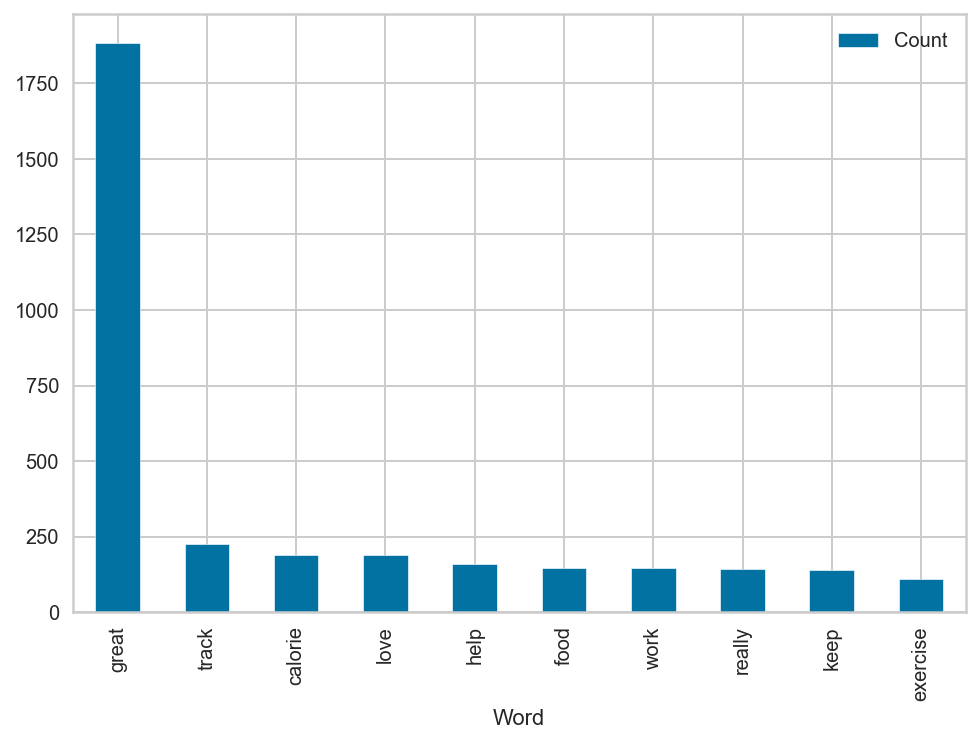

In [32]:
df6.head(10).plot(x='Word', y='Count', kind='bar')

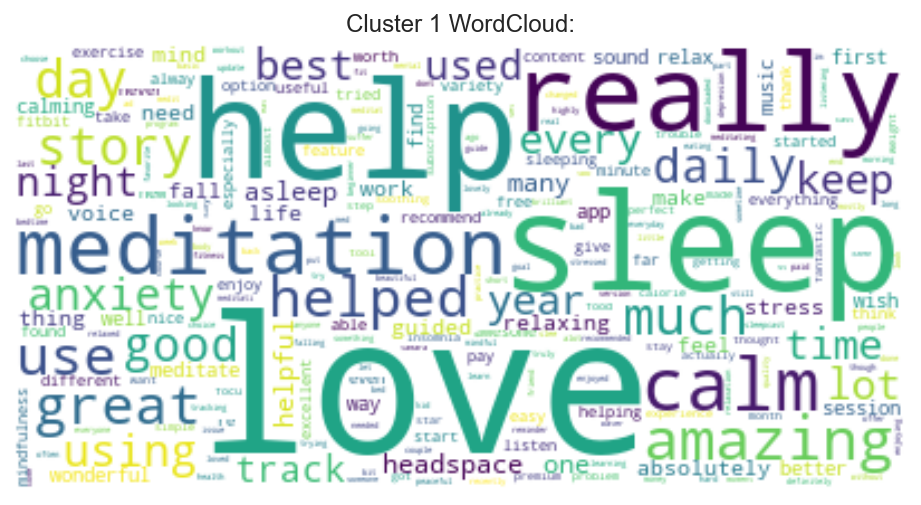

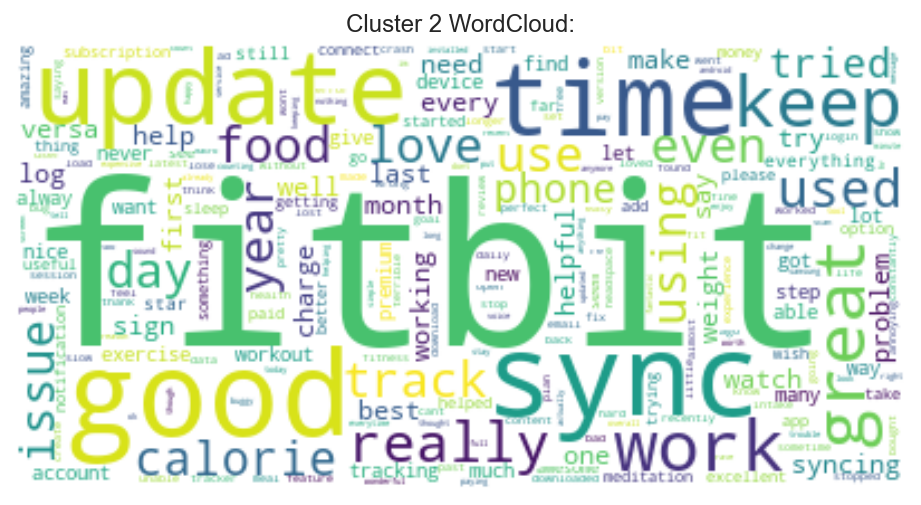

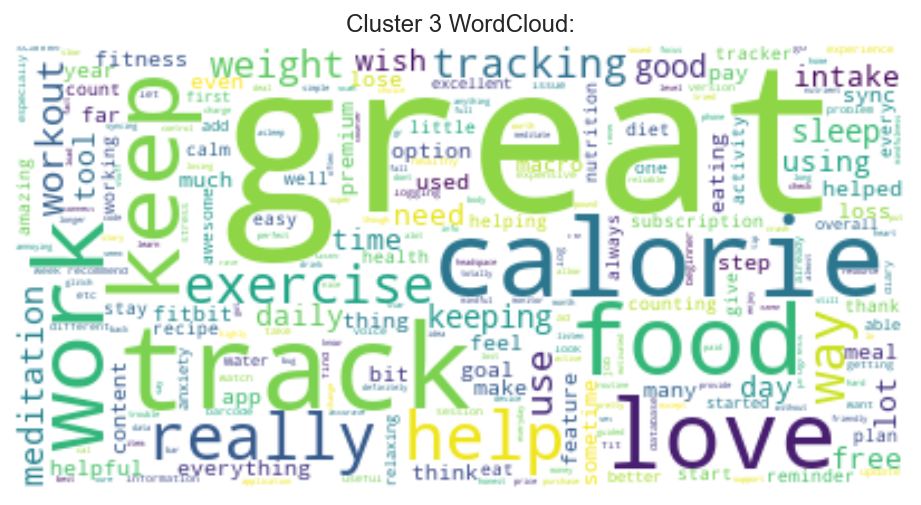

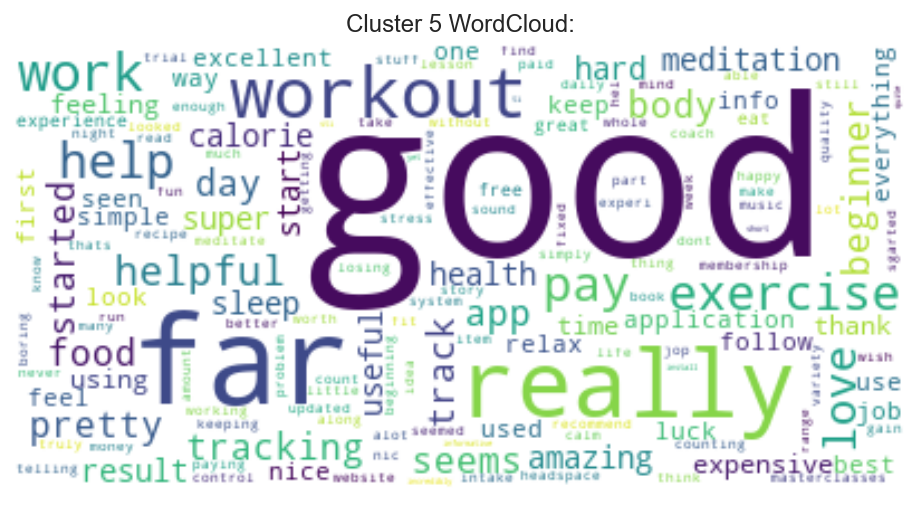

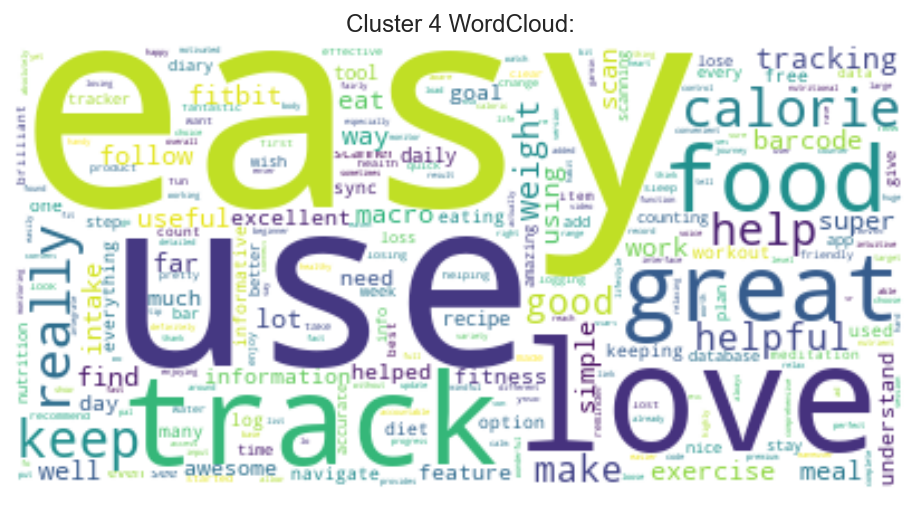

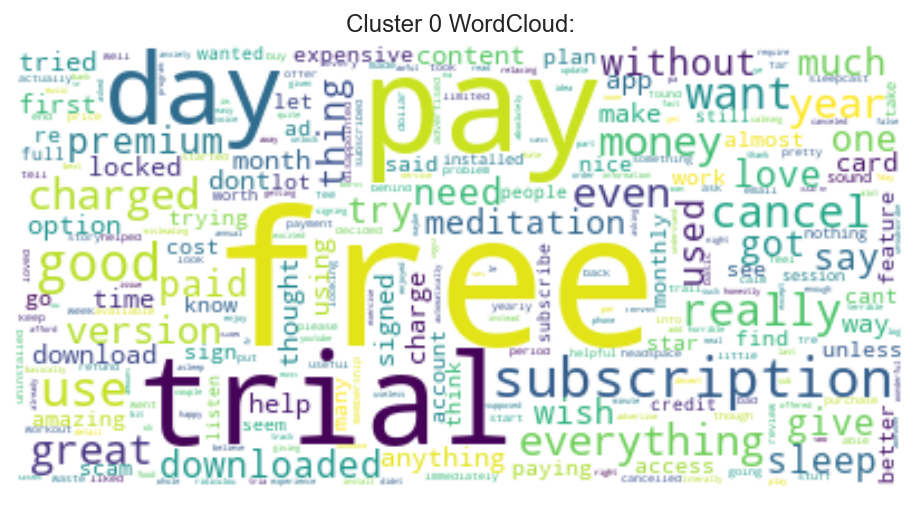

{1: <matplotlib.image.AxesImage at 0x265e61e5e80>,
 2: <matplotlib.image.AxesImage at 0x265e1ad6390>,
 3: <matplotlib.image.AxesImage at 0x265e1ae7978>,
 5: <matplotlib.image.AxesImage at 0x265e0258390>,
 4: <matplotlib.image.AxesImage at 0x265e1b4d6a0>,
 0: <matplotlib.image.AxesImage at 0x265e61f9080>}

In [128]:
fn.six_cluster_wrdcld(xtrain)

#### Cluster Value Counts:

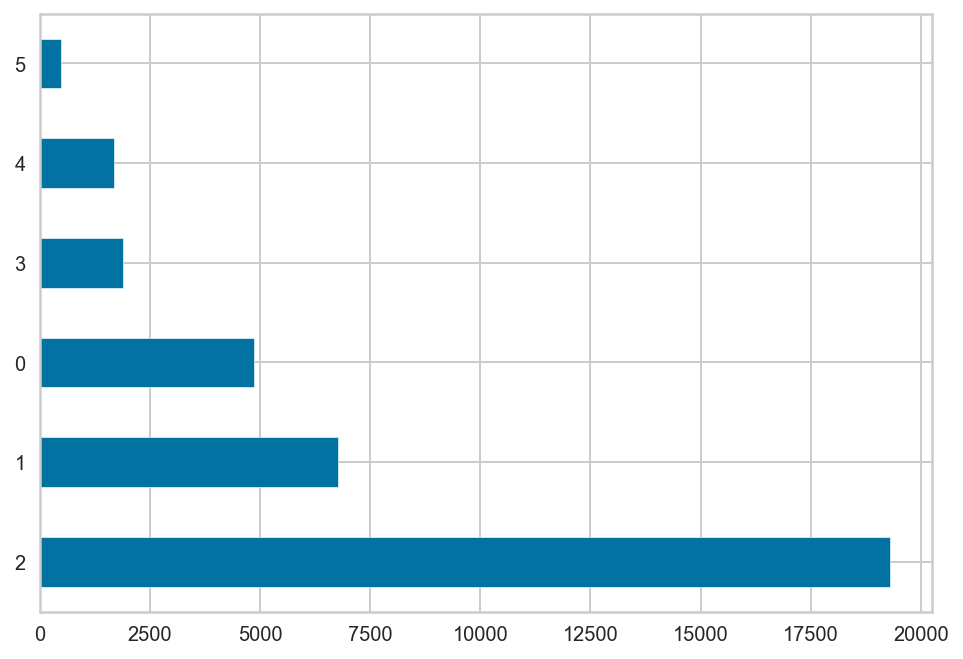

In [132]:
xtrain['6cluster'].value_counts().plot(kind='barh')

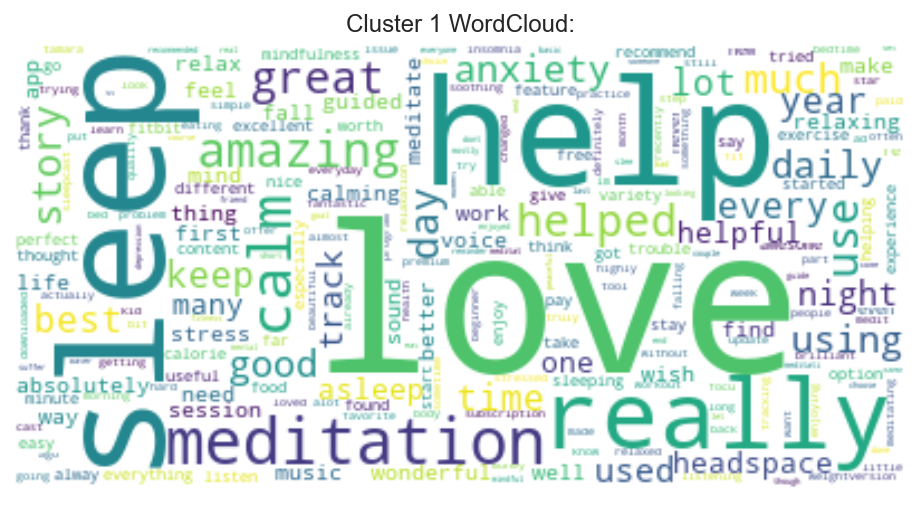

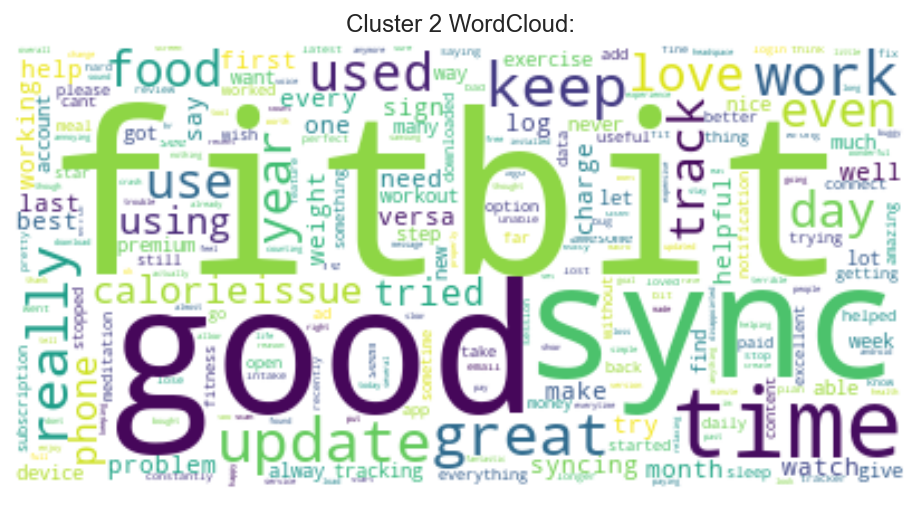

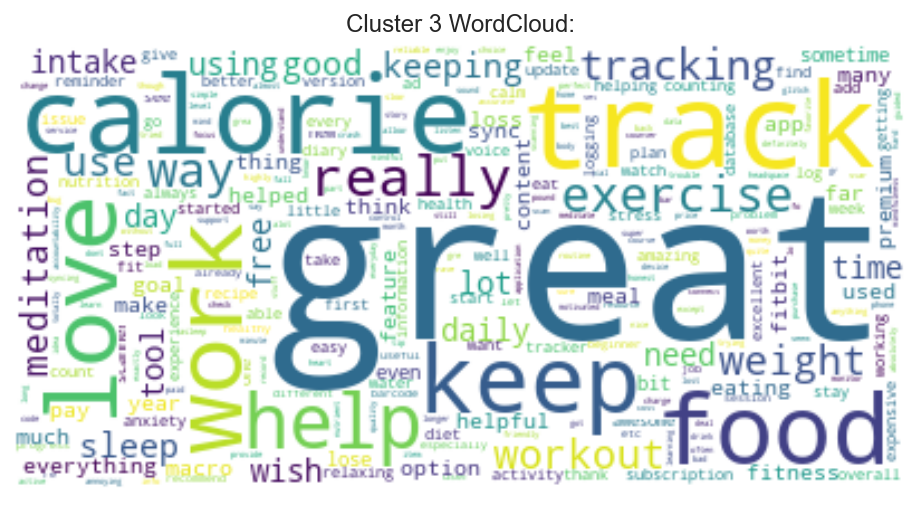

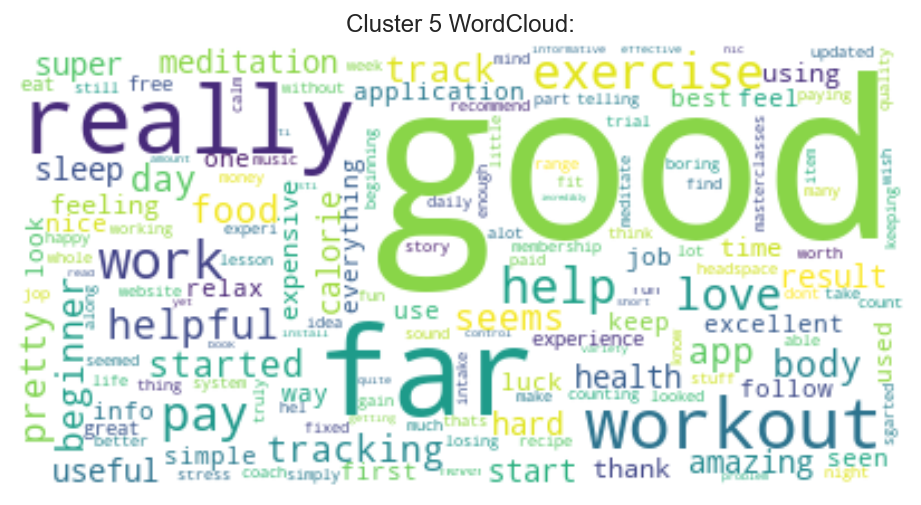

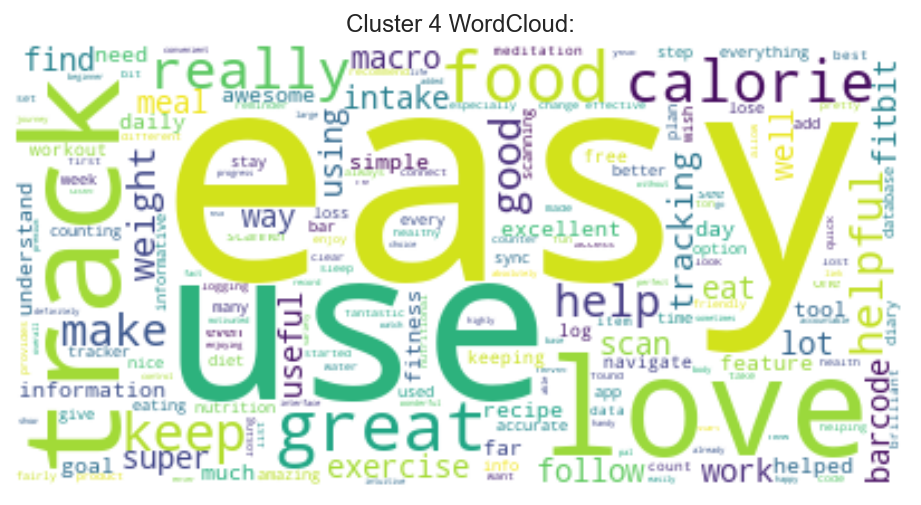

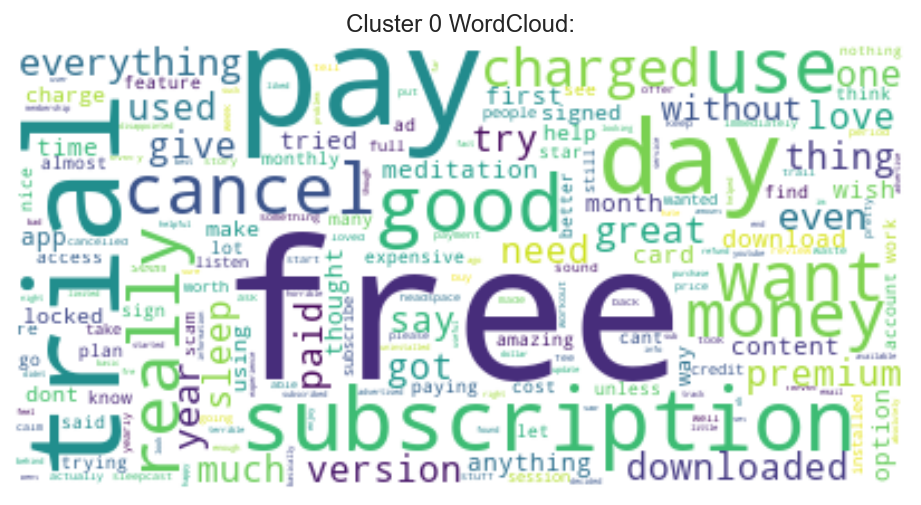

{1: <matplotlib.image.AxesImage at 0x265e6205a20>,
 2: <matplotlib.image.AxesImage at 0x265e6203f28>,
 3: <matplotlib.image.AxesImage at 0x265dfd2f710>,
 5: <matplotlib.image.AxesImage at 0x265dfd12240>,
 4: <matplotlib.image.AxesImage at 0x265e6281710>,
 0: <matplotlib.image.AxesImage at 0x265dfc4f438>}

In [130]:
fn.six_cluster_wrdcld(xtrain)

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda

https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d